# House prediction in King County, Washington

In this project, I will explore the records of houses located in King County, Washington. I will build a machine learning model that predicts the price of houses in the county.


# Data Wrangling 

In [1]:
# Import all neccesary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


## Gathering Data

In [2]:
# Read dataset to dataframe.

df = pd.read_csv("house_sales.zip")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Definition
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of  construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Accessing Data
In this section, I will access data for quality and tidyness issue.
Identified issues will then be cleaned in the next section.

In [3]:
# Increase maximum display to view all columns.

pd.set_option("display.max_columns", 30)

# Show first five rows.

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Take a look at the dimensions of dataset.

df.shape

(21613, 21)

In [5]:
# Assess dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Check the statistical summary of numerical data.

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning Data
In this section, We will fix the issues identified in the previous section.

### Data type issues in id, zipcode and date column

#### Define
Convert id and zipcode columns to string data type.
Convert date column to datetime datatype.

#### Code

In [7]:
# Convert id and zipcode columns to string data type.
df["zipcode"] = df["zipcode"].astype("str")
df["id"] = df["id"].astype("str")

# Convert date to date time data type.
df["date"] = pd.to_datetime(df["date"])

#### Test

In [8]:
# Confirm the data types have been changed to the appropriate data type.
df[["date", "id", "zipcode"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     21613 non-null  datetime64[ns]
 1   id       21613 non-null  object        
 2   zipcode  21613 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 506.7+ KB


<AxesSubplot:>

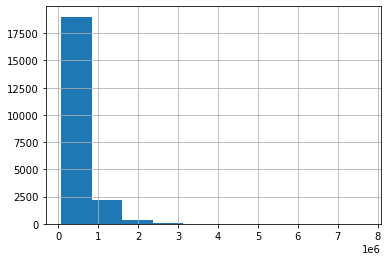

In [9]:
df["price"].hist()

### Price is positively skewed

#### Define
Use IQR method to remove outliers from the price variables.

#### Code

In [10]:
# Second and third quartile of price
q25 = df["price"].quantile(0.25)
q75 = df["price"].quantile(0.75)
q25, q75

(321950.0, 645000.0)

In [11]:
# Interquartile range
iqr = q75 -q25
iqr

323050.0

In [12]:
# Upper and lower boundary.
lower = q25 - (1.5 * iqr)
upper = q75 + (1.5 * iqr)
lower, upper

(-162625.0, 1129575.0)

In [13]:
# Exclude outliers from dataset.

df = df[df["price"].between(lower, upper)]

#### Test

In [14]:
# Shape of new dataframe.

df.shape

(20467, 21)

In [15]:
# Check the new dataset information to confirm chane.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20467 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20467 non-null  object        
 1   date           20467 non-null  datetime64[ns]
 2   price          20467 non-null  float64       
 3   bedrooms       20467 non-null  int64         
 4   bathrooms      20467 non-null  float64       
 5   sqft_living    20467 non-null  int64         
 6   sqft_lot       20467 non-null  int64         
 7   floors         20467 non-null  float64       
 8   waterfront     20467 non-null  int64         
 9   view           20467 non-null  int64         
 10  condition      20467 non-null  int64         
 11  grade          20467 non-null  int64         
 12  sqft_above     20467 non-null  int64         
 13  sqft_basement  20467 non-null  int64         
 14  yr_built       20467 non-null  int64         
 15  yr_renovated   2046

### Duplicates of house id

#### Define
Get rid of duplicate records of houses that appeared more than once.

In [16]:
# Number of duplicates
print("The dataset has a duplicates of", df.duplicated().sum())
print("The id has a duplicates of", df["id"].duplicated().sum())


The dataset has a duplicates of 0
The id has a duplicates of 170


#### Code

In [17]:
# Records of the duplicated id.

duplicate = df[df["id"].duplicated()]
duplicate.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
718,8820903380,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0,0,3,7,2660,0,1937,1990,98125,47.7142,-122.286,1120,8242


In [18]:
# Compare the duplicate of records with their duplicates.
# You will find that only their dates are the different.

duplicate_list = pd.DataFrame()
for id in duplicate["id"]:
    duplicate_list= duplicate_list.append(df[df["id"] == id])
duplicate_list.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
345,3969300030,2014-07-23,165000.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
371,2231500030,2014-10-01,315000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
372,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
717,8820903380,2014-07-28,452000.0,6,2.25,2660,13579,2.0,0,0,3,7,2660,0,1937,1990,98125,47.7142,-122.286,1120,8242
718,8820903380,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0,0,3,7,2660,0,1937,1990,98125,47.7142,-122.286,1120,8242


#### Note
When we compare the duplicate of records with the same id with their duplicates, you will find that only their sales dates are different. This means that those houses were later resold.

#### Note: 
From the above result, I found that the records of houses that have their id duplicated have the same features except their sales date.
This implies that such houses were sold and later resold. Since I will be dealing with unique records per house in this analysis, I will get rid of such duplicate records in the dataset.

In [19]:
# Get rid of records with duplicate id.

df.drop_duplicates("id", inplace=True)

#### Test

In [20]:
# Confirm there is no more duplicate record in "id" column.

df["id"].duplicated().sum()

0

In [21]:
# Confirm that the number of rows have been reduced.

df.shape

(20297, 21)

### Note:
Now, let's determine the data that will be used for the modelling.
Since we will be building a linear regression model in this project. A linear regression model work best with data that are best correlated with the target variable.

Knowing that we will be predicting the price of houses in king county, USA in this project, we will build our model with features of houses that have a correlation with price. This means that we will only be looking out for house features with correlation greater or equal to 0.5 

Next, We will plot a heatmap of all the house features in the dataset to look out for features that are correlated with price.


<AxesSubplot:>

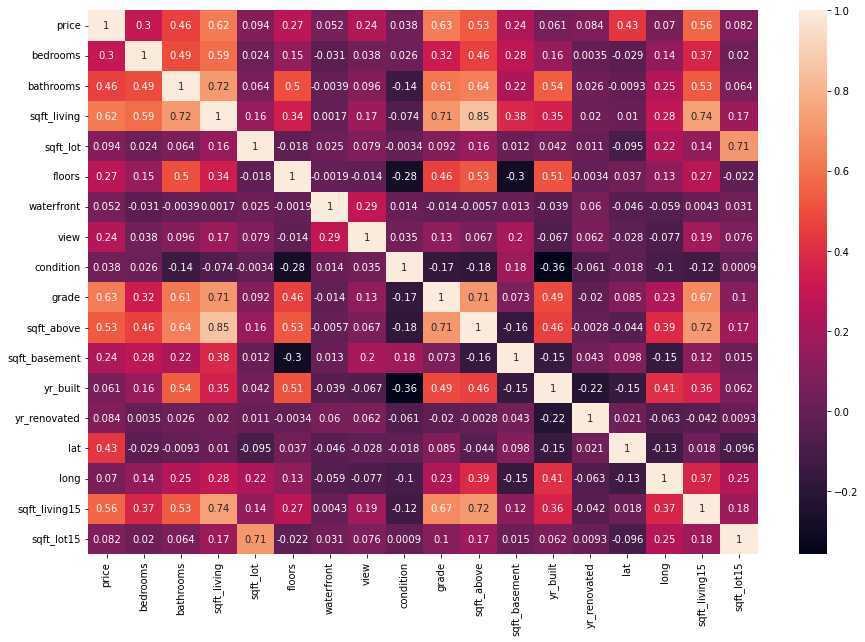

In [22]:
# Correlation of house features.
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

### Note:
There are so mauch values in the heatmap. Let's narrow it down to data that are correlated with price.

In [23]:
# The highest six value positively correlated with price.
df.corr()["price"].nlargest(6)

price            1.000000
grade            0.631656
sqft_living      0.622605
sqft_living15    0.562450
sqft_above       0.530795
bathrooms        0.455954
Name: price, dtype: float64

### Note:
We will exclude the feature with correlation lower than 0.5
Next, we will see if there are negatively correlated features with price.

In [24]:
# The highest six features negatively correlated with price.

df.corr()["price"].nsmallest(5)

condition     0.037711
waterfront    0.051560
yr_built      0.060540
long          0.070477
sqft_lot15    0.082467
Name: price, dtype: float64

### Note:
We can see that there are no house features that are negatively correlated with price in the dataset.
Below are the list of the house features that will be used for building our model in this project.
Our choice of this features bores down to their positive correlation with the price of houses.

In [25]:
# House features that will be used for building our model.

list(df.corr()["price"].nlargest(5).index)[1:]


['grade', 'sqft_living', 'sqft_living15', 'sqft_above']

### Note:
After cleaning the data and identifying house features that will be used for building our model, We can now move to splitting data that will be used for building our model.

## Split

### Note:
In this section, we will be splitting our data into feature matrix and target vector.

The feature matrix will be serve as our predictor variable while the target vector will serve as  the variable to be predicted.

In [26]:
# Split data into feature matrix and target variable.

features = ["sqft_living"]
target = "price"
X = df[features]
y = df[target]


### Note:
Next, we will divide our feature matrix and target vector into two sets: training and test data. We will randomly attribute 80 percent portion of the data to the training set. The training data will be used to build the model. The remaining 20 percent will be used to evaluate our model performance.


In [27]:
# Split data into training and data set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Confirm that the size of the features and target data are the same.

len(X_train) == len(y_train), len(X_test) == len(y_test) # True means they are of the same size.

(True, True)

# Build Model

## Baseline
### Note:
In this section, we will determine our baseline. The baseline will be used to evaluate our model performance.
If our model performance value for the test data is higher than the baseline, there is a problem but if we beat the baseline: our model performance value is lower than the baseline, the model passed.

In [29]:
# Determine a baseline that will be used to confirm the accuracy of our model predictions.

# Mean of target data.
mean = y_train.mean()

# Set mean as baseline for all columns.

y_pred_baseline = len(y_train) * [mean]

In [30]:
# Mean absolute error of the baseline.

mae_baseline = round(mean_absolute_error(y_train, y_pred_baseline))
mae_baseline

168634

### Note:
Since our baseline is 168,0000. we will be hoping that the mean absolute error of our test data is lower than this value, if it does, the model passed.

## Build
Here, we will start by building a simple linear regression model that will use the area of apartment interior living space to predict the price of houses in king county, USA. A simple linear regression model is a model that takes a single independent variable to predict a dependent variable.

Later, we will build a multiple linear regression model that uses more than one value to predict the price of houses.
### Simple Linear Regression

In [31]:
# Instantiate a linear regression model.

model_lr = LinearRegression()

# Fit the model to the training the data.

model_lr.fit(X_train, y_train)

LinearRegression()

## Predict
Use the built model to predict the price of houses. First for the training data and then for the test data.

In [32]:
# Predict the price of houses of with the trained data.

y_pred_training = model_lr.predict(X_train)

# Show the first five predictions.

y_pred_training[:5]

array([368849.09458638, 766203.73623347, 343805.7348187 , 382205.55312913,
       584221.98858837])

In [33]:
# Predict the price of houses from the test data.

y_pred_test = model_lr.predict(X_test)

# Show the first five predictions.
y_pred_test[:5]

array([418935.81412172, 620952.24958096, 567526.41540992, 487387.66415337,
       812951.34113313])

## Evaluate
In this section, we will evaluate our model performance by using the mean absolute error metrics. We will first evaluate the model performance with the training data and then evaluate the performance with the test data.
If the mean absolute error of our model on the test data beats the baseline, that is, it is lower than the baseline, the model passed. if otherwise, there is a problem. The model will be unable to generalize. That means will have to iterate: re-check our work or rebuild a model. 

In [34]:
# Find the accuracy of the model prediction of our training data using the mean_absolute_error metric.

mae_training = mean_absolute_error(y_train, y_pred_training)
print(f"The mean absolute error is {mae_training}")

The mean absolute error is 131088.40366844862


### Note:
Since the mean absolute error is 131,000, it beats our baseline which is 168,000. That's great. But,for our model to generalize, it must beat the baseline with our test data not the data it already has access to, in this case, our training data. Next, will evaluate our model performance with the test data.

In [35]:
# Find the accuracy of the model on test data.

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test

132388.82856305555

### Note:
Great! Although the mean absolute error for our test data but it beats our baseline by 36,000. That's great. Our model passed. It will be able to generalize: Makes prediction on data it has no access to.

Now that we are done with the model building and evaluation, we will move on to the next section where we will communicate the result of our model.

# Communicate
In this section, we will communicate our findings. First to a technical audience through the model equation.
Then, we will show the visualisation of the model to a non technical audience.

In [36]:
# Find the coefficient of the model.

coefficient = round(model_lr.coef_[0], 2)
print("Model coefficient for sqft_living:", coefficient)

Model coefficient for sqft_living: 166.96


### Note:
From the above cell, we can see that the coefficient for our model is around 167. What does this mean? This means that the price of houses in king county, USA increase by $ 167 for every 1 sqft increse in the area of living space of apartments.

In [37]:
# Find the intercept of the model.
 
intercept = round(model_lr.intercept_, 2)
print("Model intercept for sqft_living:", coefficient)

Model intercept for sqft_living: 166.96


### Note:
The intercept implies the model prediction when the area of the livin space of apartments at king county, USA is zero.

Below is the equation that was used for building the model on our training data.

In [38]:
# Find the linear equation of the model. 

equation = f"Price = {intercept} + {coefficient} * sqft_lving"
equation

'Price = 146797.97 + 166.96 * sqft_lving'

### Note: 
Next, will show how the actual predictions relates with the observed data through a line and scatter plot.
The line is the model prediction while the scatter plot is the observed data.

#### Note:
The relationship between the model and the training data on our trained data

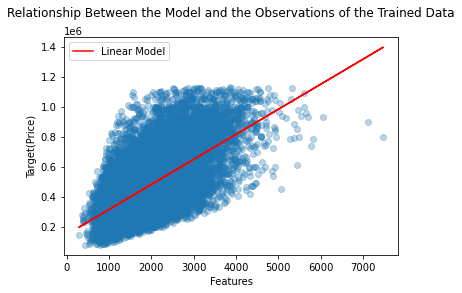

In [39]:
# Show the relationship between the model and the training data on our trained data.

plt.scatter(X_train, y_train, alpha=0.3)
plt.plot(X_train, y_pred_training, color="red", label="Linear Model");
plt.xlabel("Features")
plt.ylabel("Target(Price)")
plt.title("Relationship Between the Model and the Observations of the Trained Data\n")
plt.legend()

#### Note:
The relationship between the model and the test data

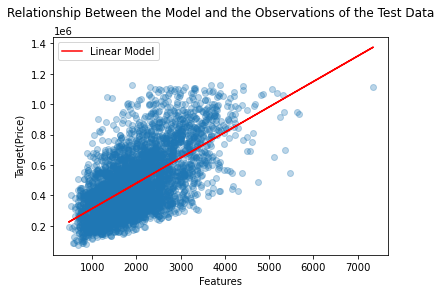

In [40]:
# Show the relationship between the model and the test data.

plt.scatter(X_test, y_test, alpha=0.3)
plt.plot(X_test, y_pred_test, color="red", label="Linear Model")
plt.xlabel("Features")
plt.ylabel("Target(Price)")
plt.title("Relationship Between the Model and the Observations of the Test Data\n")
plt.legend()

For both plots, we can see that the model shows a relationship with the observed data. The area of the living space of houses appears to be positively correlated with price. The linear model shows that as the area of living spaces increase, the price of houses also increases.

Now that we are done with communication, we will move to predict the price of houses with multiple variables in the next section.

## Multiple Linear Regression
In this section, we will build a model that predict the price of houses with multiple variables. 
Since correlation is very important in building a linear regression model, we will use only data that are correlated with price for building the model.

In [41]:
# Correlation of all the data with one another.
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.297209,0.455954,0.622605,0.094024,0.273297,0.051560,0.238687,0.037711,0.631656,0.530795,0.235428,0.060540,0.083960,0.429389,0.070477,0.562450,0.082467
bedrooms,0.297209,1.000000,0.493761,0.585056,0.023888,0.153104,-0.030743,0.038036,0.026193,0.323737,0.464043,0.283014,0.159076,0.003511,-0.029316,0.137723,0.372472,0.020424
bathrooms,0.455954,0.493761,1.000000,0.716195,0.064492,0.499960,-0.003858,0.095887,-0.138384,0.614298,0.637532,0.222891,0.542819,0.026004,-0.009335,0.245700,0.528423,0.064047
sqft_living,0.622605,0.585056,0.716195,1.000000,0.158554,0.339189,0.001661,0.168531,-0.074137,0.705415,0.853585,0.376274,0.352473,0.020253,0.010105,0.284450,0.738387,0.172019
sqft_lot,0.094024,0.023888,0.064492,0.158554,1.000000,-0.018015,0.024735,0.078599,-0.003445,0.092486,0.162088,0.012087,0.042471,0.010671,-0.095247,0.221981,0.142204,0.710315
floors,0.273297,0.153104,0.499960,0.339189,-0.018015,1.000000,-0.001924,-0.014406,-0.280388,0.455911,0.527378,-0.295387,0.511343,-0.003378,0.036591,0.133681,0.267249,-0.022433
waterfront,0.051560,-0.030743,-0.003858,0.001661,0.024735,-0.001924,1.000000,0.294802,0.014115,-0.013581,-0.005688,0.013262,-0.039299,0.059857,-0.046136,-0.059379,0.004330,0.031100
view,0.238687,0.038036,0.095887,0.168531,0.078599,-0.014406,0.294802,1.000000,0.034859,0.132146,0.066574,0.200858,-0.067217,0.061900,-0.027837,-0.077415,0.187184,0.075867
condition,0.037711,0.026193,-0.138384,-0.074137,-0.003445,-0.280388,0.014115,0.034859,1.000000,-0.171034,-0.180199,0.180040,-0.356905,-0.060766,-0.018391,-0.101656,-0.119454,0.000903
grade,0.631656,0.323737,0.614298,0.705415,0.092486,0.455911,-0.013581,0.132146,-0.171034,1.000000,0.710076,0.073452,0.490111,-0.020098,0.085094,0.227845,0.670743,0.101321


### Note:
Since we are only interested in data that are correlated with price, we will show the correlation result of price with those data only.

In [42]:
# Variables that have a positive relationship with price.

df.corr()["price"].nlargest(6)
# Note that bathrooms will be excluded because its correlation is weak with price.

price            1.000000
grade            0.631656
sqft_living      0.622605
sqft_living15    0.562450
sqft_above       0.530795
bathrooms        0.455954
Name: price, dtype: float64

### Note:
We can see that five of the above result has a positive correlation with price, Those are the variables that will be used to build our model. We will exclude "bathrooms" from it because it is not correlated with price.



In [43]:
# Columns of variables that have a relationship with price.

df_sub = df.corr()["price"].nlargest(5).index
df_sub

Index(['price', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above'], dtype='object')

In [44]:
# Variables that have a a relationship with price that will be used for modelling.

df_corr = df[df_sub]
df_corr.head()

,price,grade,sqft_living,sqft_living15,sqft_above
0,221900.0,7,1180,1340,1180
1,538000.0,7,2570,1690,2170
2,180000.0,6,770,2720,770
3,604000.0,7,1960,1360,1050
4,510000.0,8,1680,1800,1680


## Split
Like we did previously, we will split our data into feature matrix and target vector.
This time, our feature matrix will have four variables while our target vector remains the same.

In [45]:
# Feature matrix columns.

features = df_corr.columns[1:].to_list()
print(features)

# Target column.
target = "price"


['grade', 'sqft_living', 'sqft_living15', 'sqft_above']


In [46]:
#  Feature matrix.
X = df_corr[features]

# Target variable.
y = df_corr[target]
X.shape, y.shape

((20297, 4), (20297,))

### Note:
Like we did previously, we will be split our data into feature matrix and target vector.

The feature matrix will be our predictor variable while the target vector will serve as the variable to be predicted. Only difference is that, in this case, we now have four variables in our feature matrix.

In [47]:
# Split data into train and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# If result returns true for both values, 
#it means our data are well split into the right variable names. Otherwise, 
# we need to return to the preceding cell to check if we assign the appropriate variable to the result.

(len(X_train) == len(y_train)), (len(X_test) == len(y_test))

(True, True)

# Build Model

Since we are using multiple variables in building our model. The model might overfit on linear regression. 
Ridge regression is appropriate for making predictions with data with many feature variables. It adds a penalty to the linear regression model that penalises the coefficient with a value referred to as alpha.
So, we will first use ridge regression to determine the best alpha value for our model, if the alpha value is greater is than zero, we will surely build the model with a ridge regression with the best alpha value return.

However, if the best alpha value is zero, it indicates that a linear regression will do the best job for building the model.
In that case, we may use a linear or ridge regression model to build the model. Please note that when the best alpha value is zero, the ridge regression model automatically build with the linear regression model. 

In [49]:
# Range of alpha values that will be used as penalty.

parameters = {"alpha": range(20)}
parameters

{'alpha': range(0, 20)}

In [50]:
# Instantiate the Ridge Class
ridge = Ridge()

In [51]:
#  Instantiate and pass the neccessary parameters to determine 
# the best alpha value that will be used to build our model.


ridge_reg = GridSearchCV(
    estimator=ridge,
    param_grid=parameters,
    cv=5,
    verbose= 4,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
ridge_reg

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': range(0, 20)},
             scoring='neg_mean_squared_error', verbose=4)

In [52]:
# Fit to training data.

ridge_reg.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': range(0, 20)},
             scoring='neg_mean_squared_error', verbose=4)

In [53]:
# Find the model with the best alpha value.

ridge_reg.best_estimator_

Ridge(alpha=0)

### Note:
Since the alpha value with the best model performance is zero, this implies that the penalty is zero, the model is the equivalent of a linear regression model.
Now, we can choose to  build our model with a linear regression model or a ridge regression model. We will have the same result in either cases.

I don't see any reason building the model with a ridge regression since a linear regression model can do the same. 
Let's keep it simple!
Now, I will switch to using the linear regression model. 

## Baseline

Like we did with the simple linear regression, we will determine our baseline. The baseline will be used to evaluate our model performance. We expect our model mean absolute error to be lower than our baseline mean absolute error for the model to generalise.

In [54]:
# Baseline

mean = y_train.mean()
y_pred_baseline = len(y_train) * [mean]
y_pred_baseline[:5]

[476999.8033503726,
 476999.8033503726,
 476999.8033503726,
 476999.8033503726,
 476999.8033503726]

In [55]:
# Baseline Mean absolute error
baseline_mae  = mean_absolute_error(y_train, y_pred_baseline)
baseline_mae

168633.84533329596

## Build
We will build a multiple linear regression model that will use multiple variables to predict the price of houses in king county, USA. A multiple linear regression model is a model that takes a more than one independent variable to predict a dependent variable.

In [56]:
# Instantiate the linear regression class.

lr = LinearRegression()

In [57]:
# Build the model with the training data.

lr.fit(X_train, y_train)

LinearRegression()

## Predict
Here, we will predict the price of houses first with the training data and then for the test data.

In [58]:
# Make prediction with the training data.
y_pred_training = lr.predict(X_train)
y_pred_training[:5]

array([279958.48551968, 667189.83607045, 415290.1924816 , 391048.1656854 ,
       675508.86862963])

In [59]:
# Make prediction with the training data.

y_pred_test = lr.predict(X_test)
y_pred_test[:5]

array([415077.4929337 , 564276.07873717, 477966.26858442, 504708.14636594,
       930116.72941346])

# Evaluate
Like we did previously, here, we will first evaluate the model performance with the training data and then evaluate the performance with the test data. We expect the mean absolute error of our model on the test data to be lower than the baseline for our model to generalise.

In [60]:
# Mean absolute error of the test data
mean_absolute_error(y_train, y_pred_training)

119129.57336104583

In [61]:
# Mean absolute error of the test data
mean_absolute_error(y_test, y_pred_test)

119201.18528596501

# Communicate Result
We will communicate our finding by creating th formula that built the models.

In [62]:
# Coefficient
coefficient = lr.coef_.round(2)
coefficient

array([ 7.675915e+04,  1.139800e+02,  4.620000e+01, -5.790000e+01])

In [63]:
# Intercept
intercept = round(lr.intercept_, 2)
intercept

-316625.92

In [64]:
# column labels of the predicting variables.

feature_names = list(X_test.columns)
feature_names

['grade', 'sqft_living', 'sqft_living15', 'sqft_above']

In [65]:
# Create a series with the coefficients of the model and their corresponding column label.

feat_imp  = pd.Series(coefficient, index =feature_names)
feat_imp

grade            76759.15
sqft_living        113.98
sqft_living15       46.20
sqft_above         -57.90
dtype: float64

### Note:
Below is the equation that was used to build the model.

In [66]:
# Formula that was used to build our model.
print(f"{intercept}+")
for feat, coef in feat_imp.items():
    print(f"{coef} *{feat}")
    

-316625.92+
76759.15 *grade
113.98 *sqft_living
46.2 *sqft_living15
-57.9 *sqft_above


## Save Model
Lastly, we will save the two models. The models will be be used to build an interactive web application for user to predict the price of houses in King County, Washington State, USA. 

In [67]:
# Save the simple linear regression model.

with open("simple_model", "wb") as file1:
    pickle.dump(model_lr, file1)

In [73]:
# Save the multiple linear regression model.

with open("multiple_model", "wb") as file2:
    pickle.dump(lr, file2)

In [76]:
# with open("multiple_model", "rb") as f:    
#     y=pickle.load(f)